## Credit Risk Analysis Model (Task 1)-Week 6

####  Basic understandings of Credit Risk Analysis 

The objective of this analysis is to understand which are the factors that are more effecting the probability of having an high credit risk of a given company, using initially only the data of the explanatory variables of previous year to predict the credit risk of the consequent one (true values vs forecasts). <br>

In this specific notebook the original dataset will be imported, then some data cleansing will be applied in order to obtain a clearer dataset to work with in the following steps.

#### Data wrangling

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the data
credit_data = pd.read_csv(r"E:\KAIM 2\KAIM 2 Week 6\Week-6\data\data.csv")

In [7]:
# Display basic information about the dataset
print(credit_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [8]:
# Show the first few rows of the dataset
print(credit_data.head())

         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId   Amount  Value  TransactionStart

In [9]:
# Calculate summary statistics
print(credit_data.describe())

       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


In [10]:
# Check for missing values
print(credit_data.isnull().sum())

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


In [12]:
# Are there NaN or other strange values?
credit_data.isna().sum().to_frame()

,0
TransactionId,0
BatchId,0
AccountId,0
SubscriptionId,0
CustomerId,0
CurrencyCode,0
CountryCode,0
ProviderId,0
ProductId,0
ProductCategory,0


In [14]:
original_len = int(len(credit_data))
companies_df = credit_data.dropna()
print('Removed rows:', str(original_len - int(len(credit_data))))

Removed rows: 0


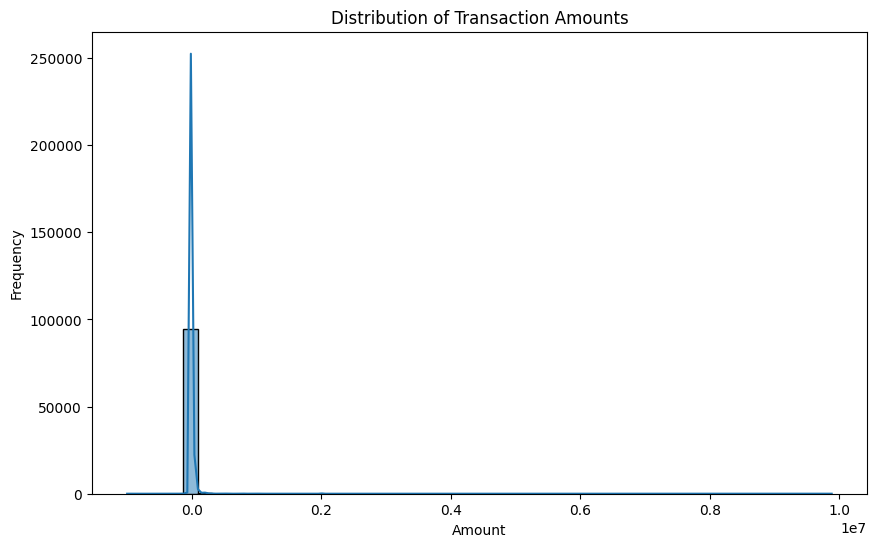

In [15]:
# Analyze the distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(credit_data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

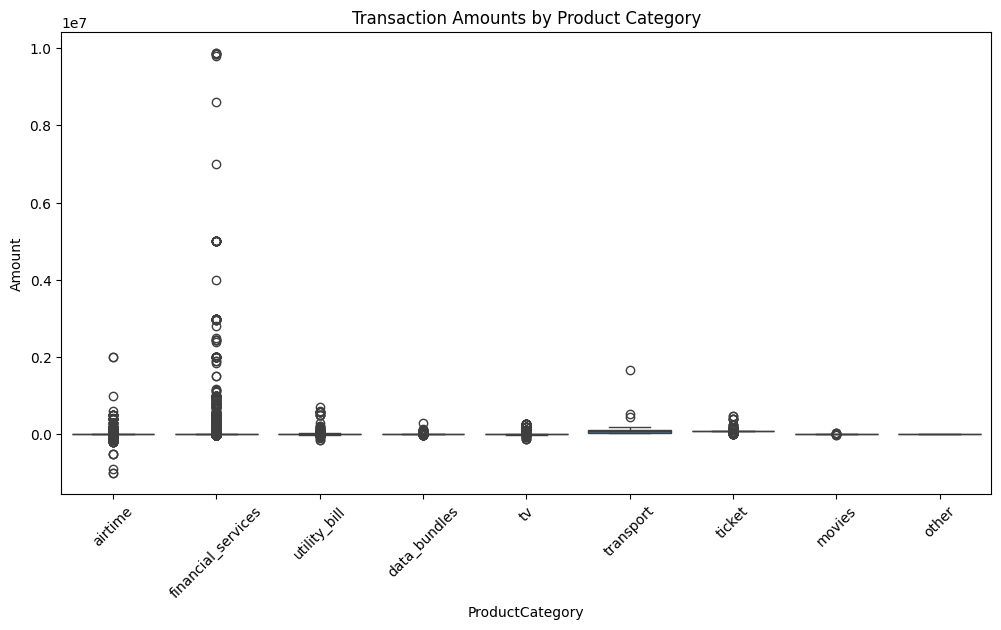

In [16]:
# Analyze the relationship between Amount and ProductCategory
plt.figure(figsize=(12, 6))
sns.boxplot(x='ProductCategory', y='Amount', data=credit_data)
plt.title('Transaction Amounts by Product Category')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Calculate the percentage of transactions by PricingStrategy
pricing_strategy_counts = credit_data['PricingStrategy'].value_counts(normalize=True) * 100
print("Percentage of transactions by PricingStrategy:")
print(pricing_strategy_counts)

Percentage of transactions by PricingStrategy:
PricingStrategy
2    83.468880
4    14.176998
1     1.951663
0     0.402459
Name: proportion, dtype: float64


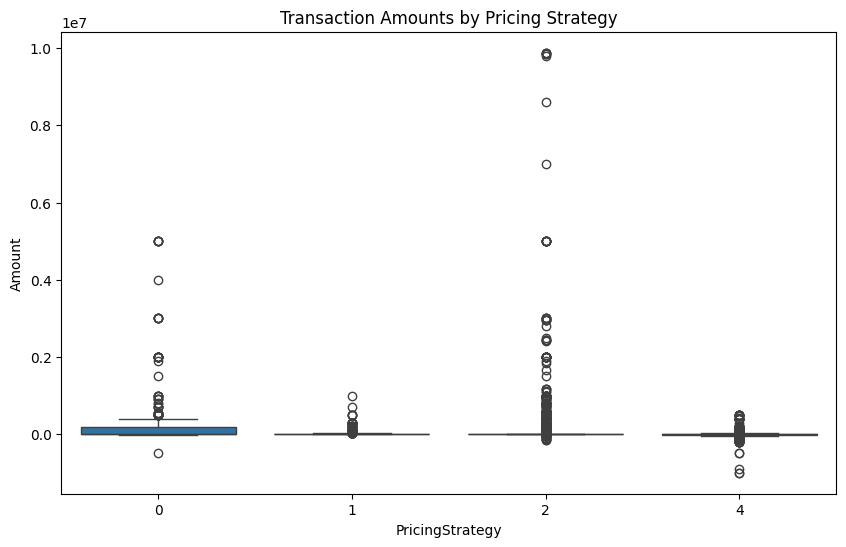

In [18]:
# Analyze the relationship between PricingStrategy and Amount
plt.figure(figsize=(10, 6))
sns.boxplot(x='PricingStrategy', y='Amount', data=credit_data)
plt.title('Transaction Amounts by Pricing Strategy')
plt.show()

In [19]:
# Calculate the percentage of fraudulent transactions
fraud_percentage = (credit_data['FraudResult'].sum() / len(credit_data)) * 100
print(f"Percentage of fraudulent transactions: {fraud_percentage:.2f}%")

Percentage of fraudulent transactions: 0.20%


After running this script, you'll have a better understanding of the data and some initial insights into factors that might be relevant for credit risk assessment. Some key aspects of credit risk to consider based on this analysis:

Transaction amounts: The distribution and patterns of transaction amounts can indicate the level of risk associated with different types of transactions.
Product categories: Some product categories might be associated with higher or lower credit risk.
Pricing strategies: Different pricing strategies might correlate with varying levels of credit risk.
Fraud: The presence of fraudulent transactions is an important factor in credit risk assessment.

To further understand credit risk, you might want to:

Analyze the relationship between customer characteristics (e.g., CustomerId) and transaction patterns.
Investigate the time patterns of transactions (using TransactionStartTime).
Examine the relationship between different variables (e.g., correlation analysis).
Look for patterns in high-value transactions or transactions with specific product categories.

In [20]:
# eventhough there is no any inconsistency let me save as new file for further analysis
# del companies_df['No']
credit_data.to_csv('E:/KAIM 2/KAIM 2 Week 6/Week-6/data/cleaned_credit_data.csv', index=False)